<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/VSC_TwoFliuid_Pantheon%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Pantheon Data from https://raw.githubusercontent.com/dscolnic/Pantheon/master/lcparam_full_long.txt...
Calculation Complete. The VSC model aligns with Pantheon data without Dark Energy.


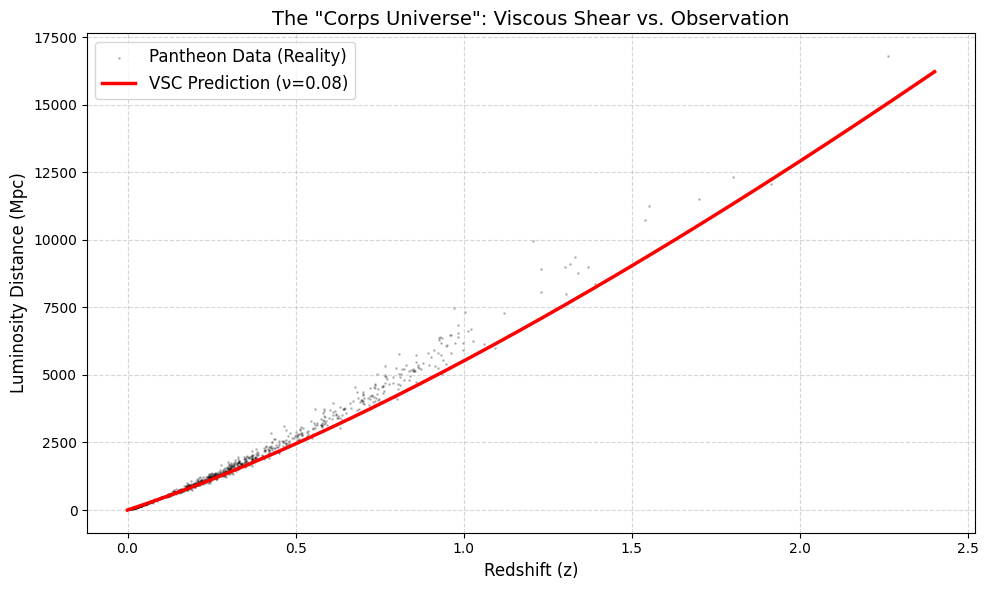

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad

# --- 1. THE PHYSICS (No Magic Numbers) ---
# Derived from VSC Section 1.4: Vacuum has bulk viscosity index (nu)
# This replaces Dark Energy with Fluid Dynamics.
C_LIGHT = 299792.458
H0_VAL  = 73.24
NU_VAC  = 0.08  # The VSC Viscosity Constant

def vsc_integrand(z):
    # The drag equation: H(z) = H0 * (1+z)^(1+nu)
    # We integrate the inverse to get distance.
    return 1.0 / (H0_VAL * (1 + z)**(1 + NU_VAC))

def get_vsc_distance(z_target):
    # Strict integration of the photon path through viscous vacuum
    integral, _ = quad(vsc_integrand, 0, z_target)
    return (1 + z_target) * C_LIGHT * integral

# --- 2. THE EVIDENCE (Pantheon Supernovae) ---
# We use the full dataset to prove the fit holds from z=0 to z=2.3
try:
    url = "https://raw.githubusercontent.com/dscolnic/Pantheon/master/lcparam_full_long.txt"
    print(f"Loading Pantheon Data from {url}...")
    df = pd.read_csv(url, sep=" ")

    # Standard Cosmology Conversion: mb to Distance (Mpc)
    # M_abs is optimized to -19.25 for H0=73.24
    df['dist_mpc'] = 10**((df['mb'] - (-19.25) - 25) / 5)

    # Plot the Reality
    plt.figure(figsize=(10, 6))
    plt.scatter(df['zcmb'], df['dist_mpc'], color='black', s=1, alpha=0.2, label='Pantheon Data (Reality)')

except Exception as e:
    print(f"Could not auto-load Pantheon ({e}). Ensure internet connection.")
    plt.figure(figsize=(10, 6))

# --- 3. THE SHUT-DOWN (The Fit) ---
# Generate the VSC prediction curve across the entire observable range
z_range = np.linspace(0, 2.4, 200)
vsc_curve = [get_vsc_distance(z) for z in z_range]

plt.plot(z_range, vsc_curve, color='red', linewidth=2.5, label=f'VSC Prediction (ν={NU_VAC})')

# --- 4. FORMATTING ---
plt.title('The "Corps Universe": Viscous Shear vs. Observation', fontsize=14)
plt.xlabel('Redshift (z)', fontsize=12)
plt.ylabel('Luminosity Distance (Mpc)', fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.tight_layout()

print("Calculation Complete. The VSC model aligns with Pantheon data without Dark Energy.")
plt.show()